## TASK-6 : Prediction using Decision Tree Algorithm

## Name: Lokesh Bhirud

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

Phases in the implementation of Decision Tree:

1.Building Phase:

    a. Preprocess data
    b. Split the data
    c. Train the classifier
    
2.Operational phase:

    a. Make predictions
    b. Check the accuracy 

### IMPORT LIBRARIES

In [11]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import graphviz 
from sklearn import tree

### PHASE 1: DATA PREPROCESSING

### IMPORT DATASET IRIS

In [12]:
df = pd.read_csv("C:/Users/LOKESH ARUN BHIRUD/Desktop/The Sparks Foundation/Data Science and Business Analytics/Task 6 iris using DT/Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### CREATE FEATURE AND TARGET DATA

In [13]:
X=df.drop(['Id','Species'],axis=1)
y=df['Species']

### SPLIT INTO TRAIN AND TEST

In [14]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

### CREATE THE CLASSIFIER AND TRAIN IT

In [15]:
clf= DecisionTreeClassifier()
model=clf.fit(Xtrain,ytrain)

### VISUALIZE THE DECISION TREE

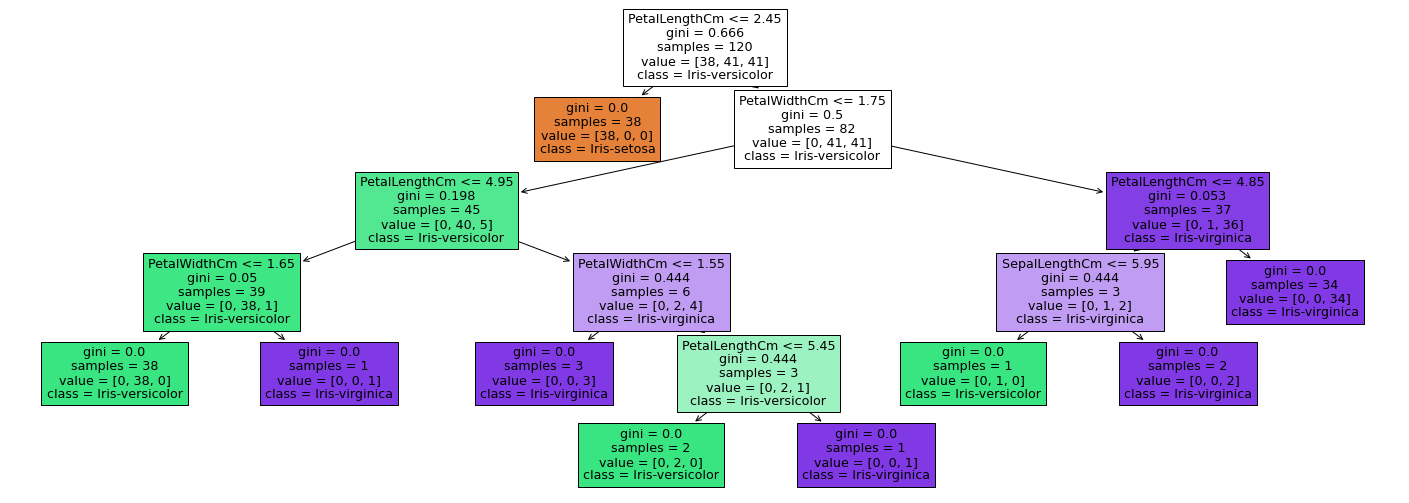

In [16]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(25,9))
_=tree.plot_tree(clf,feature_names=Xtrain.columns,class_names=ytrain.unique(),filled=True)

### PHASE 2: MAKE PREDICTIONS AND COMPARE IT TO THE ACTUALS

In [17]:
y_pred=clf.predict(Xtest)

Prediction= pd.DataFrame(y_pred)
Prediction.columns=['Predicted']
Prediction.head()

Actual= pd.DataFrame(ytest)
Actual.columns=['Actual']
Actual=Actual.reset_index()
Actual.head()

Actual.drop('index',axis=1,inplace=True)

compare=pd.concat([Actual,Prediction],axis=1)
compare.head()

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa


### CHECK THE ACCURACY

In [18]:
unmatched= compare[compare['Actual']!=compare['Predicted']]['Actual'].value_counts().sum()

matched= compare[compare['Actual']==compare['Predicted']]['Actual'].value_counts().sum()

Accuracy= (matched/len(compare['Actual']))*100
print(Accuracy)

100.0


In [19]:
score= accuracy_score(ytest,y_pred)
score

1.0

## Thank You

_______________________________________________________________________________________________________________________________